In [36]:
from bs4 import BeautifulSoup
import requests
import re
import datetime
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
start = datetime.datetime.now()

URL = input()

entries = []

USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36 OPR/77.0.4054.277"

https://eksisozluk.com/tarkan--32501?p=1


In [4]:
r = requests.get(URL, headers={'User-Agent': USER_AGENT})
soup = BeautifulSoup(r.content, 'html.parser')

In [5]:
def page_counts(url):
    """
        Get page counts of the titles
    """
    r = requests.get(url, headers={'User-Agent':USER_AGENT})
    soup = BeautifulSoup(r.content, 'html.parser')
    try:
        last_page = soup.find('div', {'class':'pager'})['data-pagecount']
    except TypeError:
        last_page = 1
    return int(last_page)

In [6]:
page_count = page_counts(URL)

In [7]:
page_count

503

In [8]:
rootURL = URL[:-1]
for i in range(int(page_count) + 1):   ##pagecount
    
    URL_ = rootURL + str(i)
    r = requests.get(URL_, headers={'User-Agent': USER_AGENT})
    soup2 = BeautifulSoup(r.text, 'html.parser')
    entry = soup2.find('div', {'class':'content'}) # find entry content
    entry_date = soup2.find('a', {'class':'entry-date permalink'}) # find date of the entry
    while entry is not None: # iterate until entry object not None 
        data = {
            'Entry': entry.get_text(separator=" ").replace('\n','').replace('\r', '').replace('\t', '').replace('    ', '').replace('bkz: ', '').replace('---  spoiler  ---', ''),# clear the contents of the entry from unnecessary things
            'Date': entry_date.text[:10],
        }
        entries.append(data)
        entry = entry.find_next('div', {'class':'content'}) # find next entry content
        entry_date = entry_date.find_next('a', {'class':'entry-date permalink'}) # find next date of the entry

In [9]:
end = datetime.datetime.now()

In [10]:
end-start

datetime.timedelta(seconds=690, microseconds=269181)

In [11]:
entries

[{'Entry': 'türkiyenin yetistirdigi en güzel ses ve yorumculardan biri.karizmatik biri. avrupada heleley heleley diye dinleyen bir dolu gavur gördüm. demek ki oluyomush dedim.  ',
  'Date': '10.05.1999'},
 {'Entry': '( biz nereye ) ( sen nereye gercek serinlik oraya ) ( enginar ) ( vezirla sah cekip babayi almak )  ',
  'Date': '30.09.1999'},
 {'Entry': '( sezgin burak )  ', 'Date': '16.01.2000'},
 {'Entry': '-tarkan, nedir o elinden sarkan? - kilic (!)  ',
  'Date': '21.05.2000'},
 {'Entry': 'şu anda seyrettiğimle tarihi filmlerin içinde en kalitesiz olanı olduğuna karar verdim, atilla\'nın komutasındaki tarkan\'ın da içlerinde bulunduğu hunlar "vandal"\'lara karşı. ayrıca kurt olarak da bildiğimiz sokak köpeğinden daha iyisini bulamamışlar, ne beklersin allahın tarkan filminden? ama yine de o kurt yardımcı oyuncu konumunda, birazcık özen gösterir insan  ',
  'Date': '24.06.2000'},
 {'Entry': "official web sitesi:   http://www.bvtarkan.com/ html source'una bakmayin sakin..  ",
  'Date

In [30]:
data = pd.DataFrame.from_dict(entries)

In [31]:
data

,Entry,Date
0,türkiyenin yetistirdigi en güzel ses ve yorumc...,10.05.1999
1,( biz nereye ) ( sen nereye gercek serinlik or...,30.09.1999
2,( sezgin burak ),16.01.2000
3,"-tarkan, nedir o elinden sarkan? - kilic (!)",21.05.2000
4,şu anda seyrettiğimle tarihi filmlerin içinde ...,24.06.2000
...,...,...
5018,25 + yıldır severek dinlediğim sanatçı. yaşı 5...,18.10.2022
5019,yuhhh 50 mi!(nazar boncuğu emojisi) helal olsu...,18.10.2022
5020,"türkiye'nin türk sanatçılar, türk müzisyenler ...",18.10.2022
5021,yılbaşı gecesi kıbrıs'ta konser verecek olan m...,25.10.2022


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entry   5023 non-null   object
 1   Date    5023 non-null   object
dtypes: object(2)
memory usage: 78.6+ KB


In [33]:
data.columns

Index(['Entry', 'Date'], dtype='object')

In [42]:
data['Date']

0       10.05.1999
1       30.09.1999
2       16.01.2000
3       21.05.2000
4       24.06.2000
           ...    
5018    18.10.2022
5019    18.10.2022
5020    18.10.2022
5021    25.10.2022
5022    28.10.2022
Name: Date, Length: 5023, dtype: object

In [84]:
data['Date'].value_counts()

10.09.2022    197
18.02.2022    172
17.02.2022    135
08.02.2018     64
22.07.2022     63
             ... 
16.01.2014      1
09.01.2014      1
07.01.2014      1
02.01.2014      1
28.10.2022      1
Name: Date, Length: 1851, dtype: int64

In [77]:
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
        n = Gösterilecek en çok rastlanan eşsiz değer sayisi
        Çıktı: Çubuk grafiği
    """
    veri_ = data[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "blue")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation =45) 
    plt.ylabel("Frekans")
    plt.title(f"Veri sıklığı - {degisken}")
    plt.show()
    print(f"{degisken}:\n{veri_sayma}")

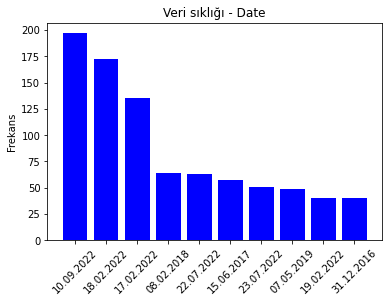

Date:
10.09.2022    197
18.02.2022    172
17.02.2022    135
08.02.2018     64
22.07.2022     63
15.06.2017     57
23.07.2022     51
07.05.2019     49
19.02.2022     40
31.12.2016     40
Name: Date, dtype: int64


In [87]:
plotBar('Date', 10)

In [98]:
date_data = data.groupby(["Date"], as_index = False).count().sort_values(by=['Entry'],ascending=False)

In [99]:
date_data.Date = pd.to_datetime(date_data.Date)

In [100]:
date_data.Date

583    2022-10-09
1059   2022-02-18
1005   2022-02-17
409    2018-08-02
1307   2022-07-22
          ...    
793    2016-01-14
791    2020-12-13
788    2012-12-13
787    2021-11-13
1850   2020-12-31
Name: Date, Length: 1851, dtype: datetime64[ns]

In [101]:
date_data.set_index('Date', inplace=True)

In [102]:
date_data

,Entry
Date,
2022-10-09,197
2022-02-18,172
2022-02-17,135
2018-08-02,64
2022-07-22,63
...,...
2016-01-14,1
2020-12-13,1
2012-12-13,1


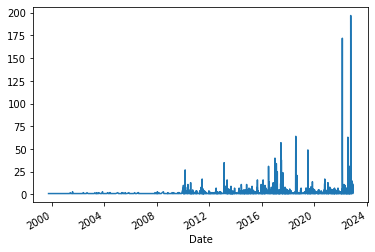

In [108]:
ax = date_data['Entry'].plot()

ticklabels = date_data.index.strftime('%Y-%m-%d')

plt.show()